In [1]:
from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd
import re
import repo_github_api_acquire as aq
import requests
import time
import json
from typing import Dict, List, Optional, Union, cast
from env import github_token, github_username

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
def create_urls(num=1759):
    ''' this function scrapes the cryptography repositories from github and returns a list of urls
    '''
    num_of_repos=num

    page_numbers = [i for i in range(0,101)]
    print(page_numbers)
    urls = [f'https://github.com/search?p={i}&q=%23defi&type=Repositories' for i in page_numbers]

    print(urls)
    return urls

In [ ]:
create_urls()

In [51]:
def get_endpoints(url):
    ''' This function gets the endpoints from the list of above urls
    '''

    headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
    
    while True:
        response = requests.get(url, headers=headers)
        if response.ok:
            break
        else:
            print('sleeping')
            time.sleep(20)
            continue
    soup = BeautifulSoup(response.text)
    
    print(response.ok)

    endpoints = []
    subgroups = soup.find_all('div', {"class":"f4 text-normal"})

    for group in subgroups:
        endpoints.append(re.search('href=".*"', str(group))[0][6:-1])

    return endpoints

In [ ]:
get_endpoints('https://github.com/search?p=100&q=%23defi&type=Repositories')

In [52]:
def make_all_endpoints():
    ''' This function returns all of the endpoints
    '''
    urls = create_urls()
    for url in urls:
        print(url)
    all_endpoints = []

    for i, page in enumerate(urls):
        all_endpoints.append(get_endpoints(page))
        print(page)

    print(len(all_endpoints))

    return all_endpoints

In [ ]:
make_all_endpoints()

In [53]:
def acquire_endpoints():
    ''' This function acquires all endpoints and writes them to a csv.
    '''
    our_endpoints = pd.Series(make_all_endpoints())
    our_endpoints.to_csv('endpoints.csv', index=False)

    return our_endpoints

In [ ]:
acquire_endpoints()

In [8]:
def flatten_endpoints():
    ''' This function flattens a 2d array into a 1d array
    '''
    end_points = pd.read_csv('endpoints.csv')
    all_values = []
    for value in end_points.values:
        for ep in value:
            all_values.append(ep)

    final_values = []
    #print(all_values)
    for value in all_values:
        for val in value.split("'"):
            if len(val) > 3:
                final_values.append(val)
                print(val)

    return pd.Series(final_values, name='endpoints')

In [9]:
final_values = flatten_endpoints()

/OffcierCia/DeFi-Developer-Road-Map
/smartcontractkit/full-blockchain-solidity-course-js
/rainbow-me/rainbow
/Bytom/bytom
/DimensionDev/Maskbook
/ccyanxyz/uniswap-arbitrage-analysis
/chainsulting/Smart-Contract-Security-Audits
/ong/awesome-decentralized-finance
/OneKeyHQ/app-monorepo
/WaykiChain/WaykiChain
/OffcierCia/DeFi-Developer-Road-Map
/smartcontractkit/full-blockchain-solidity-course-js
/rainbow-me/rainbow
/Bytom/bytom
/DimensionDev/Maskbook
/ccyanxyz/uniswap-arbitrage-analysis
/chainsulting/Smart-Contract-Security-Audits
/ong/awesome-decentralized-finance
/OneKeyHQ/app-monorepo
/WaykiChain/WaykiChain
/JumpCrypto/crypto-reading-list
/Synthetixio/synthetix
/OffcierCia/ultimate-defi-research-base
/studydefi/money-legos
/curvefi/curve-contract
/frankiefab100/Blockchain-Development-Resources
/bekatom/awesome-ethereum
/SunWeb3Sec/DeFiHackLabs
/zeriontech/defi-sdk
/BeamMW/beam
/AcalaNetwork/Acala
/uniswap-python/uniswap-python
/makerdao/dss
/web3brasil/web3brasil
/ApeWorX/ape
/Offcier

In [10]:
len(final_values)

1010

In [ ]:
final_values.to_csv('final_repos.csv', index=False)

In [11]:
repos=final_values.tolist()

In [26]:
repos

['/OffcierCia/DeFi-Developer-Road-Map',
 '/smartcontractkit/full-blockchain-solidity-course-js',
 '/rainbow-me/rainbow',
 '/Bytom/bytom',
 '/DimensionDev/Maskbook',
 '/ccyanxyz/uniswap-arbitrage-analysis',
 '/chainsulting/Smart-Contract-Security-Audits',
 '/ong/awesome-decentralized-finance',
 '/OneKeyHQ/app-monorepo',
 '/WaykiChain/WaykiChain',
 '/OffcierCia/DeFi-Developer-Road-Map',
 '/smartcontractkit/full-blockchain-solidity-course-js',
 '/rainbow-me/rainbow',
 '/Bytom/bytom',
 '/DimensionDev/Maskbook',
 '/ccyanxyz/uniswap-arbitrage-analysis',
 '/chainsulting/Smart-Contract-Security-Audits',
 '/ong/awesome-decentralized-finance',
 '/OneKeyHQ/app-monorepo',
 '/WaykiChain/WaykiChain',
 '/JumpCrypto/crypto-reading-list',
 '/Synthetixio/synthetix',
 '/OffcierCia/ultimate-defi-research-base',
 '/studydefi/money-legos',
 '/curvefi/curve-contract',
 '/frankiefab100/Blockchain-Development-Resources',
 '/bekatom/awesome-ethereum',
 '/SunWeb3Sec/DeFiHackLabs',
 '/zeriontech/defi-sdk',
 '/Bea

In [27]:
REPOS = final_values.tolist()

In [28]:
REPOS[:5]

['/OffcierCia/DeFi-Developer-Road-Map',
 '/smartcontractkit/full-blockchain-solidity-course-js',
 '/rainbow-me/rainbow',
 '/Bytom/bytom',
 '/DimensionDev/Maskbook']

In [40]:
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

In [41]:
if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )

In [42]:
def github_api_request(url: str) -> Union[List, Dict]:
    ''' This function makes requests from github and raises an error code if a specific error code is received.
    '''
    response = requests.get(url, headers=headers)
    response_data = response.json()
    if response.status_code != 200:
        raise Exception(
            f"Error response from github api! status code: {response.status_code}, "
            f"response: {json.dumps(response_data)}"
        )
    return response_data


In [43]:
def get_repo_language(repo: str) -> str:
    ''' This function fetches the language associated with a repository
    '''
    url = f"https://api.github.com/repos{repo}"
    repo_info = github_api_request(url)
    if type(repo_info) is dict:
        repo_info = cast(Dict, repo_info)
        if "language" not in repo_info:
            raise Exception(
                "'language' key not round in response\n{}".format(json.dumps(repo_info))
            )
        return repo_info["language"]
    raise Exception(
        f"Expecting a dictionary response from {url}, instead got {json.dumps(repo_info)}"
    )

In [44]:
def get_repo_contents(repo: str) -> List[Dict[str, str]]:
    ''' This function fetches the contents associated with a repo
    '''
    url = f"https://api.github.com/repos{REPOS}/contents/"
    contents = github_api_request(url)
    if type(contents) is list:
        contents = cast(List, contents)
        return contents
    raise Exception(
        f"Expecting a list response from {url}, instead got {json.dumps(contents)}"
    )

In [45]:
def get_readme_download_url(files: List[Dict[str, str]]) -> str:
    """
    Takes in a response from the github api that lists the files in a repo and
    returns the url that can be used to download the repo's README file.
    """
    for file in files:
        if file["name"].lower().startswith("readme"):
            return file["download_url"]
    return ""

In [46]:
def process_repo(repo: str) -> Dict[str, str]:
    """
    Takes a repo name like "gocodeup/codeup-setup-script" and returns a
    dictionary with the language of the repo and the readme contents.
    """
    contents = get_repo_contents(repo)
    readme_download_url = get_readme_download_url(contents)
    if readme_download_url == "":
        readme_contents = ""
    else:
        response = requests.get(readme_download_url)
        print(readme_download_url)
        print(response.status_code)
        readme_contents = requests.get(readme_download_url).text
        
    return {
        "repo": repo,
        "language": get_repo_language(repo),
        "readme_contents": readme_contents,
    }

In [47]:
def scrape_github_data() -> List[Dict[str, str]]:
    """
    Loop through all of the repos and process them. Returns the processed data.
    """
    
    output = []
    for repo in REPOS:
        
        url = f"https://api.github.com/repos{repo}/contents/"
        
        response = requests.get(url, headers=headers)
        
        if response.status_code != 200:
            print(f"Skipping {repo} because its HTTP status code is {response.status_code}")
            continue
        
        contents = response.json()
        readme_download_url = get_readme_download_url(contents)
        
        if readme_download_url == "":
            readme_contents = ""
        else:
            response = requests.get(readme_download_url)
            if response.status_code != 200:
                print(f"Skipping {repo} because its HTTP status code is {response.status_code}")
                continue
            readme_contents = requests.get(readme_download_url).text
        print(repo)
        result = {
            "repo": repo,
            "language": get_repo_language(repo),
            "readme_contents": readme_contents,
        }
    
        output.append(result)
        
    return output

In [48]:
scrape_github_data()

/OffcierCia/DeFi-Developer-Road-Map
/smartcontractkit/full-blockchain-solidity-course-js
/rainbow-me/rainbow
/Bytom/bytom
/DimensionDev/Maskbook
/ccyanxyz/uniswap-arbitrage-analysis
/chainsulting/Smart-Contract-Security-Audits
/ong/awesome-decentralized-finance
/OneKeyHQ/app-monorepo
/WaykiChain/WaykiChain
/OffcierCia/DeFi-Developer-Road-Map
/smartcontractkit/full-blockchain-solidity-course-js
/rainbow-me/rainbow
/Bytom/bytom
/DimensionDev/Maskbook
/ccyanxyz/uniswap-arbitrage-analysis
/chainsulting/Smart-Contract-Security-Audits
/ong/awesome-decentralized-finance
/OneKeyHQ/app-monorepo
/WaykiChain/WaykiChain
/JumpCrypto/crypto-reading-list
/Synthetixio/synthetix
/OffcierCia/ultimate-defi-research-base
/studydefi/money-legos
/curvefi/curve-contract
/frankiefab100/Blockchain-Development-Resources
/bekatom/awesome-ethereum
/SunWeb3Sec/DeFiHackLabs
/zeriontech/defi-sdk
/BeamMW/beam
/AcalaNetwork/Acala
/uniswap-python/uniswap-python
/makerdao/dss
/web3brasil/web3brasil
/ApeWorX/ape
/Offcier

/jkhaui/react-terra
/dbarobin/awesome-mirror
/yearn/apr-oracle
/masaun/arbitrage-btw-wbtc-and-eth
/GobyWallet/openapi
/Ricochet-Exchange/ricochet
/xBacked-DAO/algorand-wallet-select
/hegic/hegic-frontend
/enzymefinance/enzyme-subgraph
/madfish-solutions/quipuswap-webapp
/inevitable-changes/bento
/deusfinance/app-ui
/tamago-finance/tamago-finance
/dekz/defi-test-stack
/cbisaillon/Scrypto-Advent-Calendar
/bugout-dev/moonworm
/sora-xor/sora2-network
/gluwa/creditcoin-legacy
/JellyfishSDK/whale
/RubyRedOwl08/defi-trading-bot
/ChainSafe/PINT
/Wallet3/Wallet3
/bet-no-loss/bet-no-loss
/xBidi/PancakeSwapPredictionBot
/bonedaddy/go-blocknative
/mushroomsforest/deployment
/bifrost-platform/BIFI
/Setheum-Labs/Setheum
/Lucas-Kohorst/awesome-defi
/alice-si/alice-v2-monorepo
/ApeWorX/py-tokenlists
/Anish-Agnihotri/stat.farm
/defiwrapper/defiwrapper
/izumiFinance/izumi-uniV3Mining
/eoscostarica/evodex
/re-nft/legacy-front
/poocart/lend721
/glonlas/Learn-blockchains-Web3-dApps
/0xDaksh/defi-playground

/decentralized-governance/degov-constitution
/conlot-crypto/ethereum
/izumiFinance/izumi-swap-core
/fsn-dev/fsn-faucet
/ZeroPointThree17/radbag-wallet
/ApeAcademy/ERC20
/ConcealNetwork/wCCX
/gdsoumya/AtomicSwap
/garethfuller/balancer-fyi-web
/Vvaradinov/chargedefi-tracker
/0xTDF/Token-Weighted-Governance-Security-Exploit-Using-AAVE-Flash-Loans
/AlbertoCruzLuis/DefiBankDapp
/Coin-Port/CoinPort
/distributed-ledger-technology/vofarm
/Celsians/celswap-interface
/Sovryn-Origins/origins
/sebastiantf/yield-nft
/realnimish/avalanche-amm
/sovreign-protocol/sovreign-contracts
/gokhanmelma/easy-staking-contracts
/phanlancer/keykey-contracts
/CitizenDAO/Impact-Protocol
/plasmadlt/staking-factory
/Konjungate/Konjungate-Core
/masaun/GLM-stake-pool
/Coinversation/coinpro
/iJrod/Learn-Smart-Contracts-and-Tokens
/centfinance/Symmetric.PoolsUI
/kadirpekel/algorig
/mangofarmbsc/mango-farm
/krdinal/CryptoFraud
/garyb9/eth-defi-testing
/Web3ID/web3id
/yam-finance/synths-sdk
/giddyphysicist/ParallelSwapForR

ConnectionError: HTTPSConnectionPool(host='api.github.com', port=443): Max retries exceeded with url: /repos/viaMover/academic-papers/contents/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001E7FF514BB0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [57]:
if __name__ == "__main__":
    ''' This says howdy if everything is acquired correctly. 
    '''
    df = acquire_endpoints()
    data = scrape_github_data()
    json.dump(data, open("data.json", "w"), indent=1)
    print('howdy')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
['https://github.com/search?p=0&q=%23defi&type=Repositories', 'https://github.com/search?p=1&q=%23defi&type=Repositories', 'https://github.com/search?p=2&q=%23defi&type=Repositories', 'https://github.com/search?p=3&q=%23defi&type=Repositories', 'https://github.com/search?p=4&q=%23defi&type=Repositories', 'https://github.com/search?p=5&q=%23defi&type=Repositories', 'https://github.com/search?p=6&q=%23defi&type=Repositories', 'https://github.com/search?p=7&q=%23defi&type=Repositories', 'https://github.com/search?p=8&q=%23defi&type=Repositories', 'https://github.com/search?p=9&q=%23defi&type=Reposito

True
https://github.com/search?p=0&q=%23defi&type=Repositories
True
https://github.com/search?p=1&q=%23defi&type=Repositories
True
https://github.com/search?p=2&q=%23defi&type=Repositories
True
https://github.com/search?p=3&q=%23defi&type=Repositories
True
https://github.com/search?p=4&q=%23defi&type=Repositories
True
https://github.com/search?p=5&q=%23defi&type=Repositories
True
https://github.com/search?p=6&q=%23defi&type=Repositories
True
https://github.com/search?p=7&q=%23defi&type=Repositories
True
https://github.com/search?p=8&q=%23defi&type=Repositories
sleeping
sleeping
sleeping
True
https://github.com/search?p=9&q=%23defi&type=Repositories
True
https://github.com/search?p=10&q=%23defi&type=Repositories
True
https://github.com/search?p=11&q=%23defi&type=Repositories
True
https://github.com/search?p=12&q=%23defi&type=Repositories
True
https://github.com/search?p=13&q=%23defi&type=Repositories
True
https://github.com/search?p=14&q=%23defi&type=Repositories
True
https://github.com

/aave/aave-v3-core
/yieldfarming/yieldfarming
/enzymefinance/protocol
/marcinguy/betterscan-ce
/mstable/mStable-contracts
/ConsenSys/defi-score
/yearn/iearn-finance
/bmresearch/Solnet
/messari/subgraphs
/manifoldfinance/defi-threat
/smartcontractkit/defi-minimal
/sablierhq/sablier
/fintechees/Expert-Advisor-Studio
/ConcourseOpen/DeFi-Pulse-Adapters
/ArpitIngle/Library-of-Ethereum
/panacloud-modern-global-apps/defi-dapps-solidity-smart-contracts
/bobalice7/PCS-Prediction
/diadata-org/diadata
/opynfinance/GammaProtocol
/PancakeBunny-finance/Bunny
/smartcontractkit/documentation
/James-Sangalli/learn-solidity-with-examples
/bifrost-finance/bifrost
/balancer-labs/balancer-v2-monorepo
/ScopeLift/umbra-protocol
/Jeiwan/flash-loans-comparison
/interlay/interbtc
/madfish-solutions/templewallet-extension
/taarushv/helios
/ogwurujohnson/arbitrage-bot
/TP-Lab/tp-js-sdk
/sszczep/UniswapSniperBot
/opynfinance/squeeth-monorepo
/Rari-Capital/rari-dApp
/nicholashc/uniswap-skim
/alpaca-finance/bsc-alpa

/opynfinance/perp-vault-templates
/hegic/contracts
/govi-dao/cvi-contracts
/madfish-solutions/quipuswap-sdk
/chyanju/__archived__Medjai
/primitivefinance/rmm-math
/mcdexio/mai-protocol-v2
/broxus/ton-dex
/pisuthd/react-defi-widget
/DefiLab-xyz/uniswap-v3-backtest
/SnowCrashDAO/metavoxel
/tradingstrategy-ai/trade-executor
/mstable/mStable-governance-app
/raphael-mazet/SimpleFi
/byteball/stablecoin-t1-arbitrage
/cheeseswapbsc/cheeseswap-interface
/broxus/octusbridge-relay
/protofire/maker-protocol-subgraph
/plasmadlt/PPAY-Governance
/maAPPsDEV/dex-attack
/ergolabs/ergo-sdk-js
/FabianSchuessler/java-defi-bot
/balancednetwork/balanced-network-interface
/EthereansOS/unifihub-deprecated
/EthereansOS/ITEMS-Interface
/DeFi-Space-Pirates/space-pirates-contracts
/atpar/ap-monorepo
/FiveElementsLabs/archimedes
/Tadpole-finance/tadpole-protocol
/nicholashc/Delfi
/JellyfishSDK/playground
/madfish-solutions/templewallet-dapp
/linear-protocol/LiNEAR
/WeaverFi/weaverfi
/geldmacher/Cake-to-CoinTracking

/defichaininfo/Jellyfish.NET
/eric19960304/vvs-finance-profit-simulator
/Synthetixio/contract-linker
/GigameshGarages/SageNet
/harendra-shakya/anonim
/sota-platform/sota-token-contracts
/sakuracasino/roulette-contract
/mariuspod/defi_blocks
/jet-lab/jet-governance
/Alexangelj/usul
/complusnetwork/complus-master-heco
/KuroShibaONE/KURO
/Okiki-Olugunna/Crowdfunding-DeFi
/huwiler/defichain-masternode-scripts
/BenSparksCode/simple-lending-protocol
/ObeliskAuditing/obelisk-audits
/farhanx/alnafi
/coherence-finance/beamsplitter
/Amovane/Dexduels
/Martin8617/Defi-Node-for-Raspberry-Pi
/BerkeleyBlockchain/dapper-labs-consulting
/defiat-crypto/defiat-frontend-v2
/defispartan/LiquidYield
/alejoacosta74/token-swap-exchange
/sambacha/evo-whitepaper
/maAPPsDEV/recovery-attack
/liamzebedee/ohdex
/EthereansOS/super-saiyan-token
/rachit2501/Lenders.Finance-Protocol-Beta
/sjuanati/damn-vulnerable-defi
/elysia-dev/elyfi
/JuanXavier/damn-vulnerable-defi
/blockparty-sh/insane-clown-ponzi
/0xmikko/layer-ca

/freight-trust/NACHA
/masaun/nexus-reinsurance
/complusnetwork/blocks-heco
/cusdt-LINK/alphadao-presskit
/alexgo-io/alex-v1-docs
/jameslee-7/Web3.0-club
/TheAustrian1998/camDaiLeverage
/rugieri/basic-token
/alephium/community
/sambacha/defi-threat-matrix
/youves-com/youves-sdk
/Praexor/Waves_dApp
/milkyklim/thegraph-tellor
/VadimSvirdoff/tezos-dex
/tidelabs/primitives
/AnshuJalan/sizzler-network
/Layer2Labs/layer2labs.github.io
/ConcealNetwork/conceal-app-binaries
/Midas-Protocol/monorepo
/ethic-money/ethic
/cartercarlson/automated-cdp
/fsn-dev/whallet-mobile
/learn-defi/learn-defi
/XBTS/app
/jhhb/pydefipulsedata
/JavierSanzSaez/TFM-DeFi
/Blockdaemon/pyth-go
/Ricochet-Exchange/ricochet-tokens
/freight-chain/factoring
/omgswap/omg-site
/snowdot/total-volume-traded-2
/czhc/bookmarks
/AnshuJalan/newton
/theloanstream/thels
/qnity/insurance_solidity
/kernelwildfire/basedfun
/defistuff/web3-api
/byteball/discount-stablecoin-aa
/anrid/traderbot
/reach-sh/humble-sdk
/izumiFinance/izumi-iZiSwa

[{'repo': '/OffcierCia/DeFi-Developer-Road-Map',
  'language': None,
  'readme_contents': '# DeFi Developer Road Map\n\n**Here we collect and discuss the best DeFi & Blockchain researches and tools - contributions are welcome.**\n\n**Feel free to submit a pull request, with anything from small fixes to translations, docs or tools you\'d like to add.**\n\n\n## Support Me:\n\nSupport is **very** important to me, with it I can do what I love - educating DeFi & Crypto users :sparkling_heart:  First, a few words, dear friends... I want to thank everyone who sent me donations! Much much thanks to you, I was able to bear the loss of my last job, found new meaning of life, and finally started writing a lot!\n\nThe best thing is to support me directly by donating to my address on Ethereum Main-net or any of the compatible networks or to any address from the list below:\n\n[![Supported by GitCoin](https://img.shields.io/badge/Support%20via-GitCoin-yellowgreen)](https://gitcoin.co/grants/3150/def
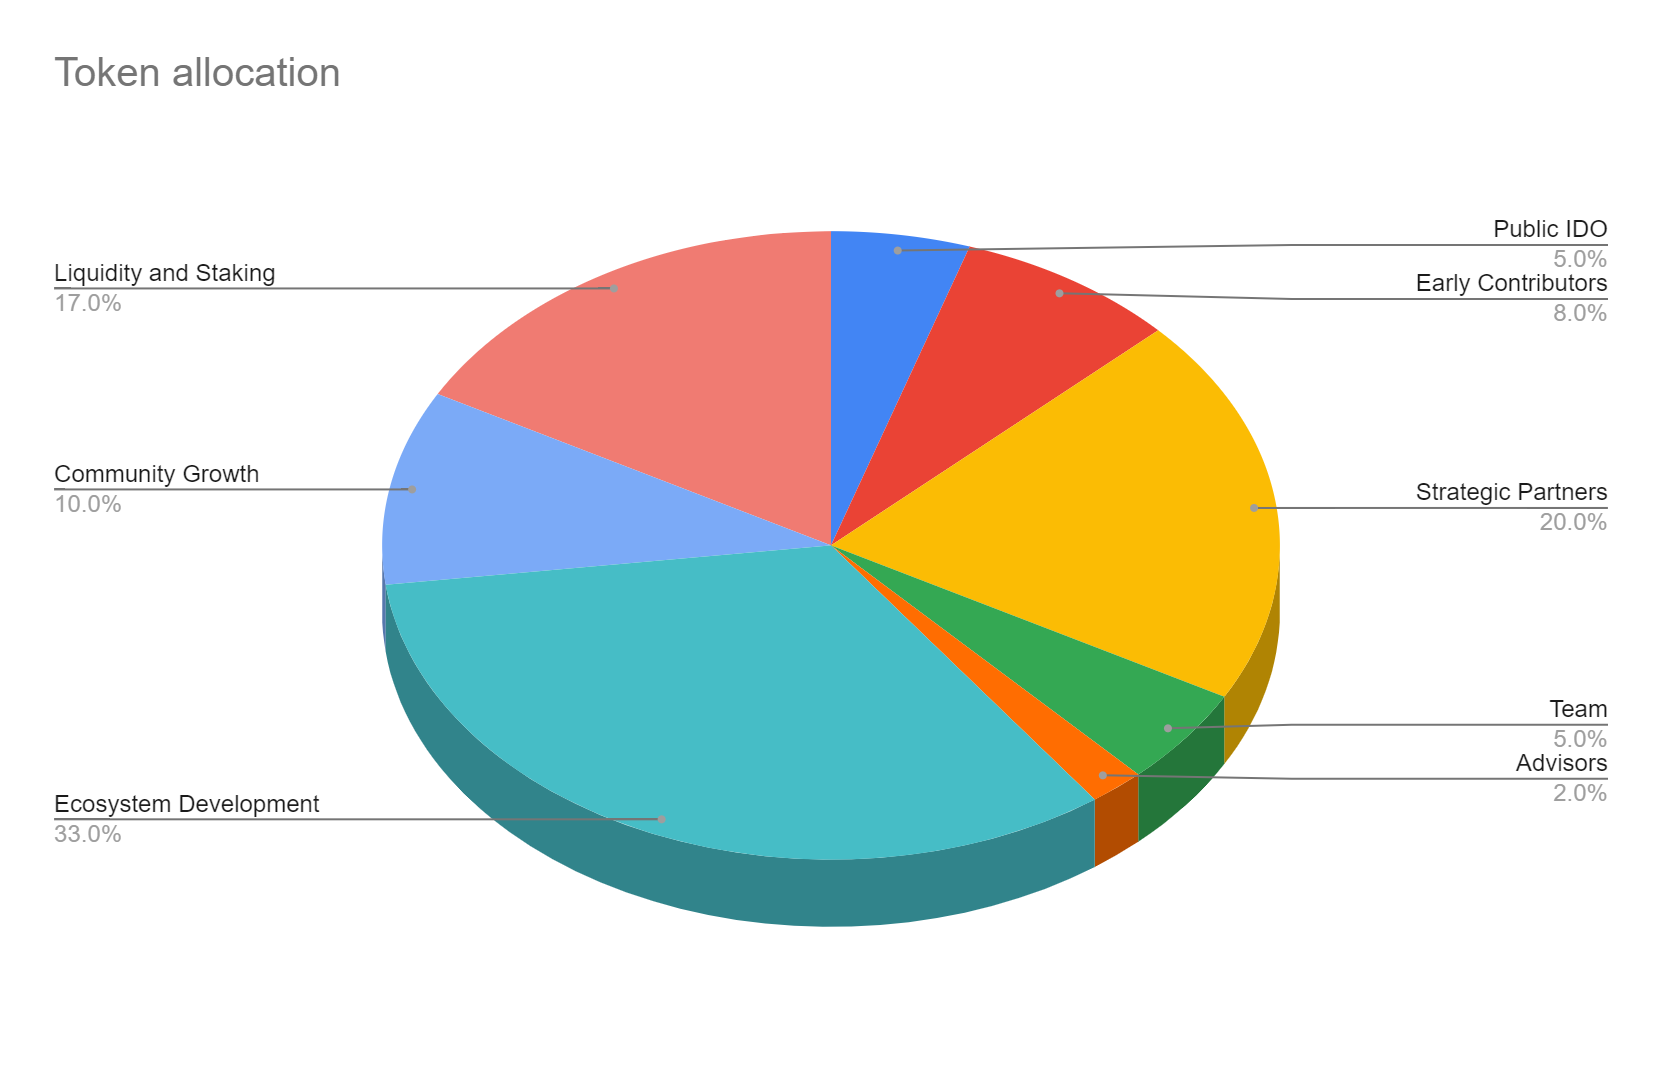
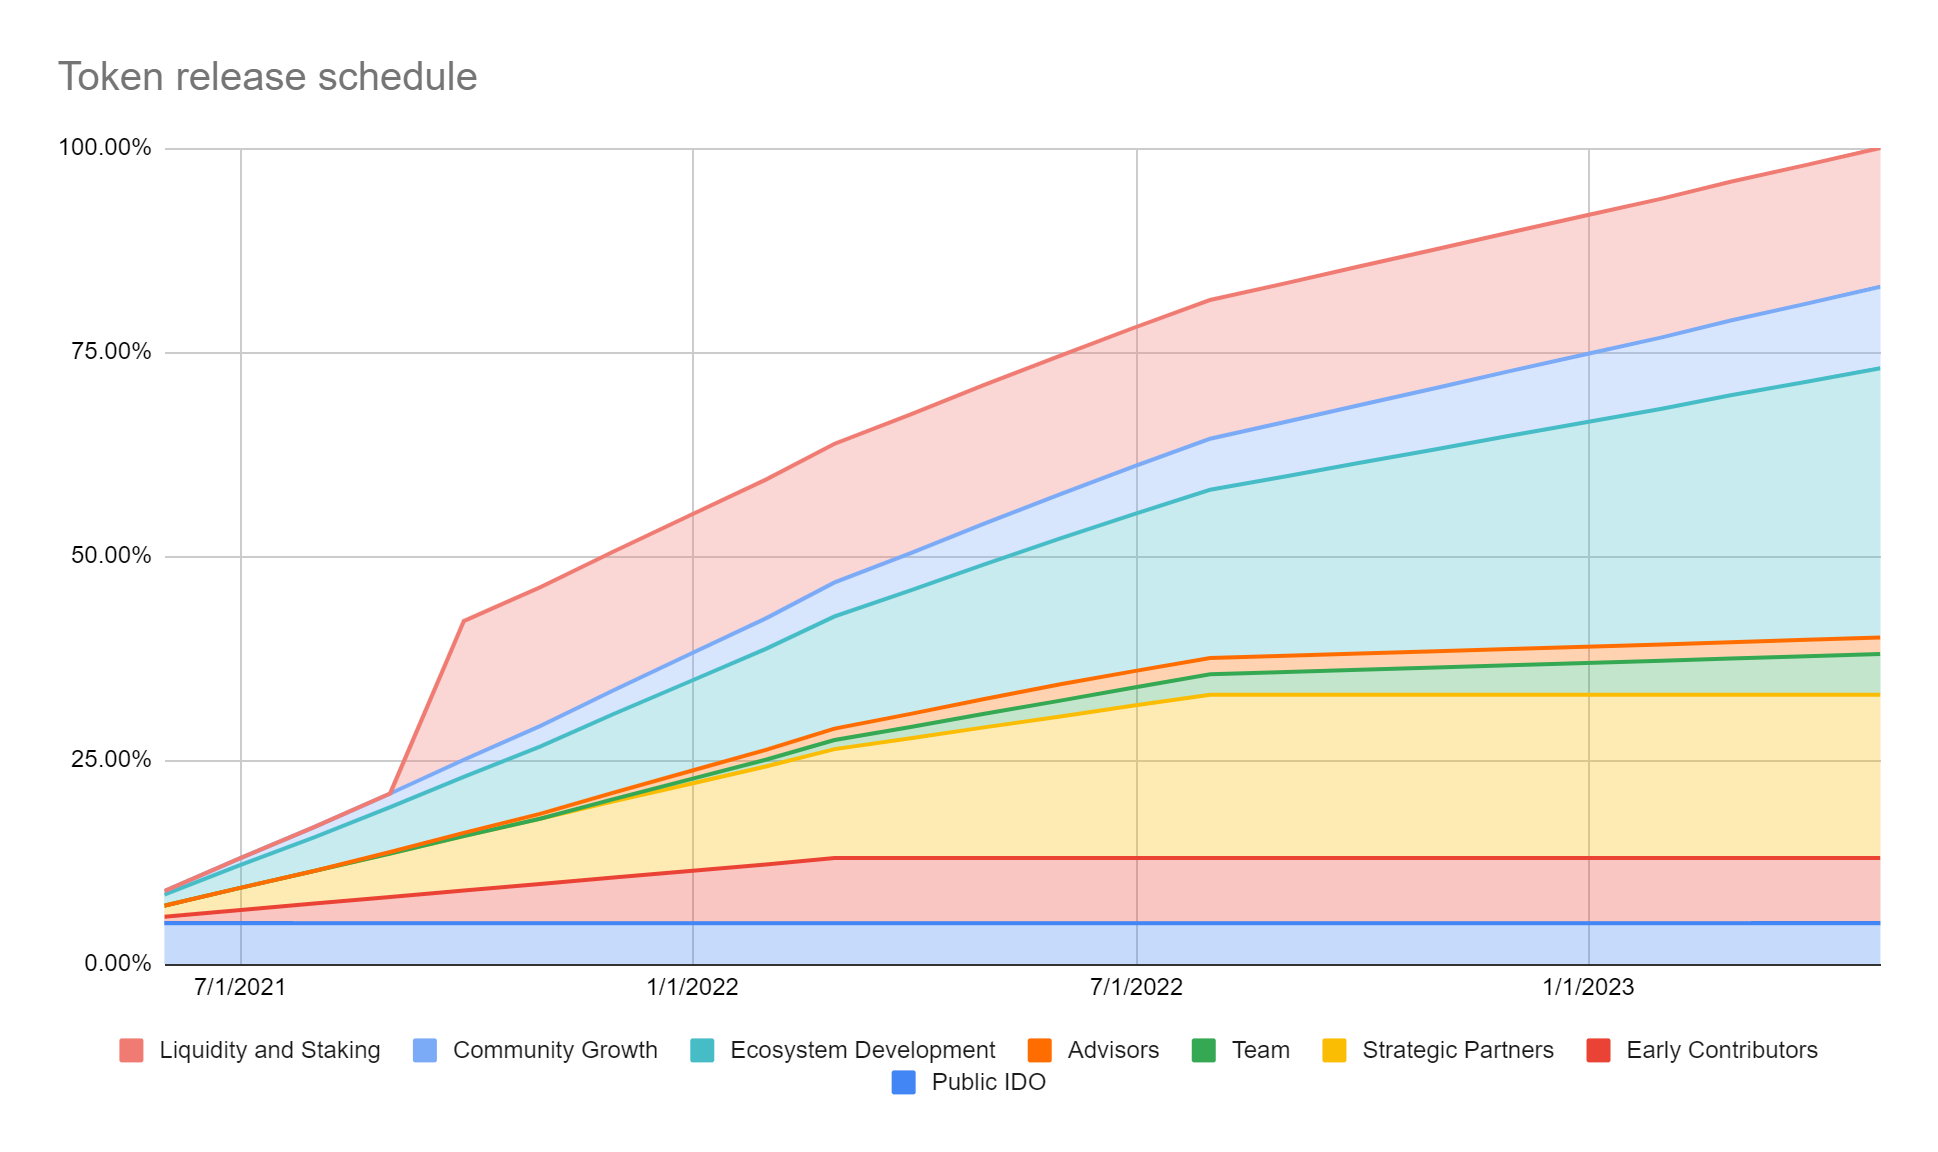

In [21]:
data

In [20]:
#allows the json file to be read in as data
with open('data.json', 'r') as f:
  data = json.load(f)

In [3]:
df = pd.read_json('data.json')

In [4]:
df.head()

repo    language  \
0                /OffcierCia/DeFi-Developer-Road-Map        None   
1  /smartcontractkit/full-blockchain-solidity-cou...        None   
2                                /rainbow-me/rainbow  TypeScript   
3                                       /Bytom/bytom          Go   
4                             /DimensionDev/Maskbook  TypeScript   

                                     readme_contents  
0  # DeFi Developer Road Map\n\n**Here we collect...  
1  <!-- [YouTube Video](https://www.youtube.com/w...  
2  ![](https://pbs.twimg.com/profile_banners/1103...  
3  Bytom\n======\n\n[![Build Status](https://trav...  
4  <!-- cspell:disable -->\n<!-- markdownlint-dis...

In [5]:
#check for nulls
df.isna().sum()

repo                 0
language           129
readme_contents      0
dtype: int64

In [6]:
#handle the nulls
df["language"].fillna("Not Specified", inplace = True)

In [7]:
df.isna().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [16]:
df.head()

repo       language  \
0                /OffcierCia/DeFi-Developer-Road-Map  Not Specified   
1  /smartcontractkit/full-blockchain-solidity-cou...  Not Specified   
2                                /rainbow-me/rainbow     TypeScript   
3                                       /Bytom/bytom             Go   
4                             /DimensionDev/Maskbook     TypeScript   

                                     readme_contents  
0  # DeFi Developer Road Map\n\n**Here we collect...  
1  <!-- [YouTube Video](https://www.youtube.com/w...  
2  ![](https://pbs.twimg.com/profile_banners/1103...  
3  Bytom\n======\n\n[![Build Status](https://trav...  
4  <!-- cspell:disable -->\n<!-- markdownlint-dis...

## Repos scraped, language and contents pulled, df ready to be prepped

In [8]:
#prepare imports

import unicodedata
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


import nlp_acquire
import nlp_prepare

### Define a function named basic_clean. It should take in a string and apply some basic text cleaning to it:
- Lowercase everything
- Normalize unicode characters
- Replace anything that is not a letter, number, whitespace or a single quote.

In [45]:
scrape_repo_content = nlp_acquire.read_url_or_file_repo()

Found File


In [10]:
df_repo = pd.DataFrame(scrape_repo_content)

In [91]:
def make_lower(content_list):
    cleaned_content = []
    for content in content_list:
        clean_content = {
            'repo': content['repo'].lower(),
            'language': content['language'],
            'readme_contents':content['readme_contents'].lower()
          }
        cleaned_content.append(clean_content)
    return cleaned_content

def make_no_special_chars(content_list):
    cleaned_content = []
    r_ex = r"[^a-zA-Z0-9\s]"
    for content in content_list:
        clean_content = {
            'repo': re.sub(r_ex,'', content['repo']),
            'language': content['language'],
            'readme_contents': re.sub(r_ex,'', content['readme_contents'])
        }
        cleaned_content.append(clean_content)
    return cleaned_content

def make_normal(content_list):
    cleaned_content = []
    for content in content_list:
        clean_content = {
            'repo': unicodedata.normalize('NFKD', content['repo']).encode('ascii', 'ignore').decode('utf-8', 'ignore'),
            'language': content['language'],
            'readme_contents': unicodedata.normalize('NFKD', content['readme_contents']).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        }
        cleaned_content.append(clean_content)
    return cleaned_content

def basic_clean(content_list):
    content_list = make_normal(content_list)
    content_list = make_no_special_chars(content_list)
    content_list = make_lower(content_list)
    return content_list

In [92]:
#clean with basic clean function
scrape_repo_content = basic_clean(data)

In [93]:
temp = pd.DataFrame(scrape_repo_content)
temp.head()

repo    language  \
0                  offcierciadefideveloperroadmap        None   
1  smartcontractkitfullblockchainsoliditycoursejs        None   
2                                rainbowmerainbow  TypeScript   
3                                      bytombytom          Go   
4                            dimensiondevmaskbook  TypeScript   

                                     readme_contents  
0   defi developer road map\n\nhere we collect an...  
1   youtube videohttpswwwyoutubecomwatchvm576wgid...  
2  httpspbstwimgcomprofilebanners1103191459409420...  
3  bytom\n\n\nbuild statushttpstravisciorgbytomby...  
4   cspelldisable \n markdownlintdisable noinline...

In [28]:
def tokenize(s):
    tokenizer = ToktokTokenizer()
    return tokenizer.tokenize(s)

def mass_tokenize(content_list):
    for content in content_list:
        content['clean'] = tokenize(content['readme_contents'])
    return content_list

In [36]:
#tokenize
scrape_repo_content =mass_tokenize(scrape_repo_content)

In [30]:
def stem(s):
    ps = nltk.porter.PorterStemmer()
    return [ps.stem(word) for word in s]

def mass_stem(content_list):
    for content in content_list:
        content['stemmed'] = stem(content['clean'])
    return content_list

In [31]:
#stem
scrape_repo_content = mass_stem(scrape_repo_content)

In [32]:
def lemmatize(s):
    wnl = nltk.stem.WordNetLemmatizer()
    return [wnl.lemmatize(word) for word in s]

def mass_lemmatize(content_list):
    for content in content_list:
        content['lemmatized'] = lemmatize(content['clean'])
    return content_list

In [37]:
#lemmatize
scrape_repo_content = mass_lemmatize(scrape_repo_content)

In [39]:
def remove_stopwords(s, extra_words = [], exclude_words = []):
    stopwords_list = nltk.corpus.stopwords.words('english')
    stopwords_list = stopwords_list + extra_words
    return [word for word in s if word not in stopwords_list]

def mass_remove_stopwords(content_list):
    for content in content_list:
        content['clean'] = remove_stopwords(content['clean'])
    return content_list

In [40]:
#remove stopwords
scrape_repo_content = mass_remove_stopwords(scrape_repo_content)

In [49]:
repo_df = pd.DataFrame(nlp_acquire.read_url_or_file_repo())
repo_df

Found File


repo    language  \
0                   /OffcierCia/DeFi-Developer-Road-Map        None   
1     /smartcontractkit/full-blockchain-solidity-cou...        None   
2                                   /rainbow-me/rainbow  TypeScript   
3                                          /Bytom/bytom          Go   
4                                /DimensionDev/Maskbook  TypeScript   
...                                                 ...         ...   
1005                   /byteball/discount-stablecoin-aa  JavaScript   
1006                                   /anrid/traderbot  JavaScript   
1007                               /reach-sh/humble-sdk  JavaScript   
1008                    /izumiFinance/izumi-iZiSwap-sdk  TypeScript   
1009             /cryptochan-xyz/awesome-cryptocurrency        None   

                                        readme_contents  
0     # DeFi Developer Road Map\n\n**Here we collect...  
1     <!-- [YouTube Video](https://www.youtube.com/w...  
2     ![](https://pbs.twimg.com/profile_banners/1103...  
3     Bytom\n======\n\n[![Build Status](https://trav...  
4     <!-- cspell:disable -->\n<!-- markdownlint-dis...  
...                                                 ...  
1005  # Autonomous Agent for Discount Stablecoins\n\...  
1006  # Create Yield Farming Charts\n\n### Farming L...  
1007  # HumbleSDK v2.0.0\n\n<header>\n  <img src="./...  
1008  \n# iZUMi-iZiSwap-sdk\n\nThe latest version of...  
1009  # Awesome Cryptocurrency \n\nA curated list of...  

[1010 rows x 3 columns]

### combined function that cleans, tokenizes, removes stopwords, stems, lemmatizes, creates a datafram with new columns

In [94]:
def make_dataframe(text_dict):
    text_dict = basic_clean(text_dict)
    text_dict = mass_tokenize(text_dict)
    text_dict = mass_remove_stopwords(text_dict)
    text_dict = mass_stem(text_dict)
    text_dict = mass_lemmatize(text_dict)
    return pd.DataFrame(text_dict)

In [95]:
repo_df = make_dataframe(data)
repo_df

repo    language  \
0                     offcierciadefideveloperroadmap        None   
1     smartcontractkitfullblockchainsoliditycoursejs        None   
2                                   rainbowmerainbow  TypeScript   
3                                         bytombytom          Go   
4                               dimensiondevmaskbook  TypeScript   
...                                              ...         ...   
1005                    byteballdiscountstablecoinaa  JavaScript   
1006                                  anridtraderbot  JavaScript   
1007                                reachshhumblesdk  JavaScript   
1008                     izumifinanceizumiiziswapsdk  TypeScript   
1009              cryptochanxyzawesomecryptocurrency        None   

                                        readme_contents  \
0      defi developer road map\n\nhere we collect an...   
1      youtube videohttpswwwyoutubecomwatchvm576wgid...   
2     httpspbstwimgcomprofilebanners1103191459409420...   
3     bytom\n\n\nbuild statushttpstravisciorgbytomby...   
4      cspelldisable \n markdownlintdisable noinline...   
...                                                 ...   
1005   autonomous agent for discount stablecoins\n\n...   
1006   create yield farming charts\n\n farming lunao...   
1007   humblesdk v200\n\nheader\n  img srclogowhites...   
1008  \n izumiiziswapsdk\n\nthe latest version of th...   
1009   awesome cryptocurrency \n\na curated list of ...   

                                                  clean  \
0     [defi, developer, road, map, collect, discuss,...   
1     [youtube, videohttpswwwyoutubecomwatchvm576wgi...   
2     [httpspbstwimgcomprofilebanners110319145940942...   
3     [bytom, build, statushttpstravisciorgbytombyto...   
4     [cspelldisable, markdownlintdisable, noinlineh...   
...                                                 ...   
1005  [autonomous, agent, discount, stablecoins, sou...   
1006  [create, yield, farming, charts, farming, luna...   
1007  [humblesdk, v200, header, img, srclogowhitesvg...   
1008  [izumiiziswapsdk, latest, version, sdk, consid...   
1009  [awesome, cryptocurrency, curated, list, aweso...   

                                                stemmed  \
0     [defi, develop, road, map, collect, discuss, b...   
1     [youtub, videohttpswwwyoutubecomwatchvm576wgid...   
2     [httpspbstwimgcomprofilebanners110319145940942...   
3     [bytom, build, statushttpstravisciorgbytombyto...   
4     [cspelldis, markdownlintdis, noinlinehtml, fir...   
...                                                 ...   
1005  [autonom, agent, discount, stablecoin, sourc, ...   
1006  [creat, yield, farm, chart, farm, lunaosmo, lp...   
1007  [humblesdk, v200, header, img, srclogowhitesvg...   
1008  [izumiiziswapsdk, latest, version, sdk, consid...   
1009  [awesom, cryptocurr, curat, list, awesom, cryp...   

                                             lemmatized  
0     [defi, developer, road, map, collect, discus, ...  
1     [youtube, videohttpswwwyoutubecomwatchvm576wgi...  
2     [httpspbstwimgcomprofilebanners110319145940942...  
3     [bytom, build, statushttpstravisciorgbytombyto...  
4     [cspelldisable, markdownlintdisable, noinlineh...  
...                                                 ...  
1005  [autonomous, agent, discount, stablecoins, sou...  
1006  [create, yield, farming, chart, farming, lunao...  
1007  [humblesdk, v200, header, img, srclogowhitesvg...  
1008  [izumiiziswapsdk, latest, version, sdk, consid...  
1009  [awesome, cryptocurrency, curated, list, aweso...  

[1010 rows x 6 columns]

In [96]:
repo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1010 non-null   object
 1   language         881 non-null    object
 2   readme_contents  1010 non-null   object
 3   clean            1010 non-null   object
 4   stemmed          1010 non-null   object
 5   lemmatized       1010 non-null   object
dtypes: object(6)
memory usage: 47.5+ KB


In [104]:
repo_df["language"].fillna("Not Specified", inplace = True)

In [105]:
repo_df.head()

repo       language  \
0                  offcierciadefideveloperroadmap  Not Specified   
1  smartcontractkitfullblockchainsoliditycoursejs  Not Specified   
2                                rainbowmerainbow     TypeScript   
3                                      bytombytom             Go   
4                            dimensiondevmaskbook     TypeScript   

                                     readme_contents  \
0   defi developer road map\n\nhere we collect an...   
1   youtube videohttpswwwyoutubecomwatchvm576wgid...   
2  httpspbstwimgcomprofilebanners1103191459409420...   
3  bytom\n\n\nbuild statushttpstravisciorgbytomby...   
4   cspelldisable \n markdownlintdisable noinline...   

                                               clean  \
0  [defi, developer, road, map, collect, discuss,...   
1  [youtube, videohttpswwwyoutubecomwatchvm576wgi...   
2  [httpspbstwimgcomprofilebanners110319145940942...   
3  [bytom, build, statushttpstravisciorgbytombyto...   
4  [cspelldisable, markdownlintdisable, noinlineh...   

                                             stemmed  \
0  [defi, develop, road, map, collect, discuss, b...   
1  [youtub, videohttpswwwyoutubecomwatchvm576wgid...   
2  [httpspbstwimgcomprofilebanners110319145940942...   
3  [bytom, build, statushttpstravisciorgbytombyto...   
4  [cspelldis, markdownlintdis, noinlinehtml, fir...   

                                          lemmatized  
0  [defi, developer, road, map, collect, discus, ...  
1  [youtube, videohttpswwwyoutubecomwatchvm576wgi...  
2  [httpspbstwimgcomprofilebanners110319145940942...  
3  [bytom, build, statushttpstravisciorgbytombyto...  
4  [cspelldisable, markdownlintdisable, noinlineh...

### Exploration
Explore and visualize the natural language data that you have acquired. Here are some ideas for exploration:

1. What are the most common words in READMEs?
2. Does the length of the README vary by programming language?
3. Do different programming languages use a different number of unique words?
4. Are there any words that uniquely identify a programming language?

In [106]:
#percentage of languages

labels = pd.concat([repo_df.language.value_counts(),
                    repo_df.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

n   percent
JavaScript        240  0.237624
TypeScript        224  0.221782
Solidity          167  0.165347
Not Specified     129  0.127723
Python             59  0.058416
Rust               32  0.031683
Go                 26  0.025743
HTML               26  0.025743
C++                13  0.012871
CSS                12  0.011881
Vue                12  0.011881
Shell              11  0.010891
C#                 10  0.009901
Jupyter Notebook   10  0.009901
SCSS                5  0.004950
Java                5  0.004950
Kotlin              4  0.003960
Swift               3  0.002970
Elixir              2  0.001980
Clojure             2  0.001980
TeX                 2  0.001980
Racket              2  0.001980
Tcl                 1  0.000990
Clarity             1  0.000990
Elm                 1  0.000990
PHP                 1  0.000990
Vyper               1  0.000990
Cairo               1  0.000990
Dockerfile          1  0.000990
Motoko              1  0.000990
Scala               1  0.000990
Nim                 1  0.000990
PLpgSQL             1  0.000990
Ruby                1  0.000990
Haskell             1  0.000990
q                   1  0.000990

In [133]:
ADDITIONAL_STOPWORDS = []

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [134]:
#breaking out the words of each of the most used languages

In [191]:
js_words = clean(' '.join(repo_df[repo_df.language == 'JavaScript'].readme_contents))
ts_words = clean(' '.join(repo_df[repo_df.language == 'TypeScript'].readme_contents))
notspec_words = clean(' '.join(repo_df[repo_df.language == 'Not Specified'].readme_contents))
solidity_words = clean(' '.join(repo_df[repo_df.language == 'Solidity'].readme_contents))
python_words= clean(' '.join(repo_df[repo_df.language == 'Python'].readme_contents))
rust_words= clean(' '.join(repo_df[repo_df.language == 'Rust'].readme_contents))
go_words= clean(' '.join(repo_df[repo_df.language == 'Go'].readme_contents))

all_words = clean(' '.join(repo_df.readme_contents))

In [192]:
#frequency of the words
js_freq = pd.Series(js_words).value_counts()
ts_freq = pd.Series(ts_words).value_counts()
notspec_freq = pd.Series(notspec_words).value_counts()
solidity_freq = pd.Series(solidity_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
go_freq = pd.Series(go_words).value_counts()

all_freq = pd.Series(all_words).value_counts()

In [193]:
js_freq

contract                                                       862
token                                                          794
run                                                            473
npm                                                            369
address                                                        363
                                                              ... 
salil                                                            1
naik                                                             1
httpssubmirrorxyz0xf75aaa99e6877fa62375c37c343c51606488cd08      1
twoplus                                                          1
hereclireadmemd                                                  1
Length: 13232, dtype: int64

In [194]:
word_counts = (pd.concat([all_freq, js_freq, ts_freq, notspec_freq,solidity_freq, python_freq, rust_freq, go_freq], axis=1, sort=True)
                .set_axis(['all', 'js', 'ts','notspec','solidity','python','rust','go'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

all   js  ts  notspec  solidity  python  rust  go
0      674  121  47      317        20      29    22  13
00      10    4   4        0         0       0     0   0
000     24   15   3        5         1       0     0   0
0000     4    0   1        0         0       0     0   0
00000    4    0   0        0         0       2     0   2

In [195]:
#number of unique wordcounts
js_freq.nunique(),ts_freq.nunique(),notspec_freq.nunique(),solidity_freq.nunique(),python_freq.nunique(),rust_freq.nunique(),go_freq.nunique()

(170, 169, 197, 109, 86, 58, 46)

In [196]:
js_freq.value_counts()

1      8310
2      1661
3       702
4       459
5       296
       ... 
152       1
157       1
159       1
167       1
89        1
Length: 170, dtype: int64

In [197]:
word_counts = (pd.concat([all_freq, js_freq, ts_freq, notspec_freq, solidity_freq, python_freq, rust_freq, go_freq], axis=1, sort=True)
                .set_axis(['all', 'js', 'ts','notspec','solidity','python','rust','go'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

all   js  ts  notspec  solidity  python  rust  go
0      674  121  47      317        20      29    22  13
00      10    4   4        0         0       0     0   0
000     24   15   3        5         1       0     0   0
0000     4    0   1        0         0       0     0   0
00000    4    0   0        0         0       2     0   2

In [198]:
word_counts.sort_values(by='all', ascending=False).head(10)

all   js   ts  notspec  solidity  python  rust  go
contract  3914  862  676      837       888     208    90  38
token     3460  794  628      615       696     267    60  30
run       1740  473  468       65       185     159   130  70
1         1722  237  500      309       162      93    47  20
smart     1622  254  180      706       226      93    23  15
ethereum  1530  251  142      876        98      23    27  22
project   1530  330  264      577        97      91    24  20
address   1503  363  312      148       242      69    19  24
detail    1499   59   58     1090        25      23    18   4
install   1438  280  324      320       135     165    60  37

In [199]:
pd.concat([word_counts[word_counts.js == 0].sort_values(by='js').tail(6),
           word_counts[word_counts.ts == 0].sort_values(by='ts').tail(6),
           word_counts[word_counts.notspec == 0].sort_values(by='notspec').tail(6),
           word_counts[word_counts.solidity == 0].sort_values(by='solidity').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.rust == 0].sort_values(by='rust').tail(6),
           word_counts[word_counts.go == 0].sort_values(by='go').tail(6)])

all  js  ts  notspec  \
examined                                              1   0   0        0   
examining                                             4   0   0        3   
exampleali                                            2   0   0        2   
examplebsummary                                       1   0   0        0   
exactreceive                                          2   0   2        0   
zuniswapv2                                            1   0   0        0   
ethhttpsgithubcomaustintgriffithscaffoldeth           1   0   0        1   
ethhttpsgithubcomscaffoldethscaffoldethtreestre...    1   0   0        0   
ethhttpsuserimagesgithubusercontentcom376177381...    1   0   0        0   
ethhub                                                1   0   0        0   
ethhypedns                                            1   0   0        1   
zuniswapv2                                            1   0   0        0   
emparameter                                           2   0   2        0   
emp                                                   1   0   1        0   
emorem                                                1   0   1        0   
emojis                                                2   2   0        0   
emnextem                                             10   0  10        0   
zuniswapv2                                            1   0   0        0   
exchangehttpsapprangoexchangeswap                     1   0   0        1   
exchangehttpsdefipulsecomblogwhatisadecentraliz...    1   0   0        1   
exchangehttpsgithubcomproofsuiteampclient             1   1   0        0   
exchangehttpshopexchange                              1   0   0        1   
examplesjscompoundjssupplyethjs                       1   1   0        0   
zuniswap                                              1   1   0        0   
eticos                                                1   0   0        1   
etiquette                                             1   1   0        0   
etk                                                   1   0   0        1   
etp                                                   1   0   0        1   
ethvolusdc                                            2   2   0        0   
zuniswapv2                                            1   0   0        0   
etherscanhttpsetherscanioapis                         1   0   0        0   
etherscanhttpsetherscaniotoken0x00000000001876e...    1   0   0        1   
etherscanhttpsetherscaniotoken0x06af07097c9eeb7...    1   0   0        1   
etherscanhttpsetherscaniotoken0x261b45d85ccfeab...    1   0   0        1   
etherscanhttpsetherscaniotoken0x49d716dfe60b373...    1   0   0        1   
zuniswapv2                                            1   0   0        0   
ethhttpsgithubcomaustintgriffithscaffoldeth           1   0   0        1   
ethhttpsgithubcomscaffoldethscaffoldethtreestre...    1   0   0        0   
ethhub                                                1   0   0        0   
ethhubhttpsethhubsubstackcom                          1   0   0        1   
ethglobalhttpsethglobalco                             1   0   1        0   
zuniswapv2                                            1   0   0        0   

                                                    solidity  python  rust  go  
examined                                                   1       0     0   0  
examining                                                  0       1     0   0  
exampleali                                                 0       0     0   0  
examplebsummary                                            0       0     1   0  
exactreceive                                               0       0     0   0  
zuniswapv2                                                 1       0     0   0  
ethhttpsgithubcomaustintgriffithscaffoldeth                0       0     0   0  
ethhttpsgithubcomscaffoldethscaffoldethtreestre...         0       0     0   0  
ethhttpsuserimagesgithubusercontentcom376177381...    

In [200]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Language for the 25 most common words')

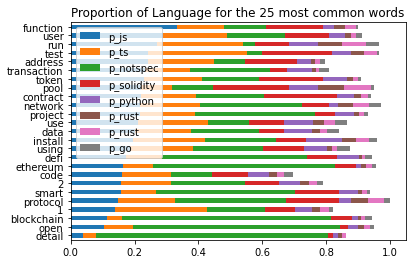

In [201]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_js=word_counts.js / word_counts['all'],
         p_ts=word_counts.ts / word_counts['all'],
         p_notspec=word_counts.notspec / word_counts['all'],
         p_solidity=word_counts.solidity / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_rust=word_counts.rust / word_counts['all'],
         p_go=word_counts.go / word_counts['all'] 
        )
 .sort_values(by='all')
 [['p_js', 'p_ts','p_notspec','p_solidity','p_python','p_rust','p_rust','p_go']]
 .tail(25)
 .sort_values('p_js')
 .plot.barh(stacked=True))

plt.title('Proportion of Language for the 25 most common words')

In [202]:
(word_counts
 [(word_counts.ts > 10) & (word_counts.js > 10)]
 .assign(ratio=lambda df: df.ts / (df.js + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

all   js   ts  notspec  solidity  python  rust  go      ratio
payment     353  183   16       52         5       2     5   4   0.087427
truffle     251  151   14       31        43       0     1   0   0.092709
web3        664  342   32      177        12      18     5   4   0.093565
dao         254  114   12       68        33       5     1   3   0.105254
javascript  404  217   26       94        24       2     1   1   0.119810
wrapped     131   12   83       14         4       6     0   1   6.910908
symbol      437   42  330        3        12      12     1   1   7.855273
weth        286   14  188       10        29      39     0   0  13.418986
decimal     452   25  355        2         8       1     0   0  14.194322
chainid     416   15  371        6         3       0     6   9  24.716855

IndexError: list index out of range

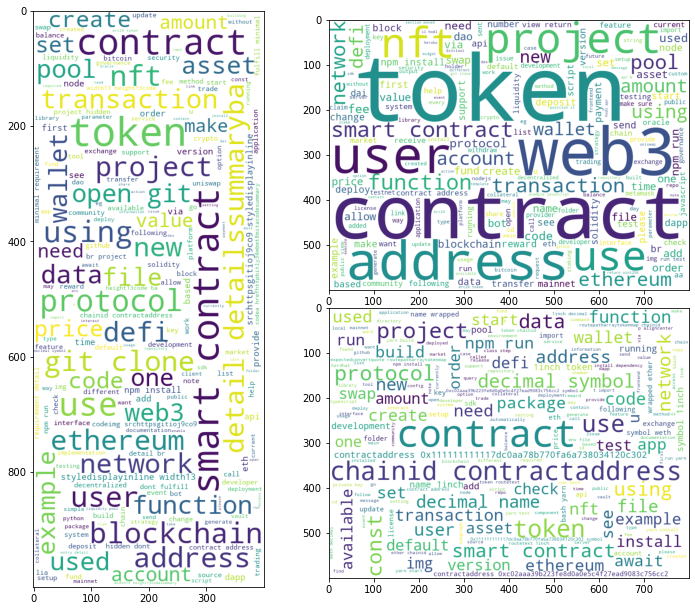

In [203]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
js_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(js_words))
ts_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ts_words))
notspec_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(notspec_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))
rust_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(rust_words))
go_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(go_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(js_cloud)
axs[2].imshow(ts_cloud)
# axs[3].imshow(notspec_cloud)
axs[4].imshow(python_cloud)
axs[5].imshow(rust_cloud)
axs[6].imshow(go_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Javascript')
axs[2].set_title('TS')
axs[3].set_title('NotSpec')
axs[4].set_title('Python')
axs[5].set_title('Rust')
axs[6].set_title('Go')

for ax in axs: ax.axis('off')

In [204]:
repo_df.lemmatized

0       [defi, developer, road, map, collect, discus, ...
1       [youtube, videohttpswwwyoutubecomwatchvm576wgi...
2       [httpspbstwimgcomprofilebanners110319145940942...
3       [bytom, build, statushttpstravisciorgbytombyto...
4       [cspelldisable, markdownlintdisable, noinlineh...
                              ...                        
1005    [autonomous, agent, discount, stablecoins, sou...
1006    [create, yield, farming, chart, farming, lunao...
1007    [humblesdk, v200, header, img, srclogowhitesvg...
1008    [izumiiziswapsdk, latest, version, sdk, consid...
1009    [awesome, cryptocurrency, curated, list, aweso...
Name: lemmatized, Length: 1010, dtype: object

In [205]:
top_20_js_bigrams = (pd.Series(nltk.ngrams(js_words, 2))
                      .value_counts()
                      .head(20))

top_20_js_bigrams.head()

(smart, contract)      219
(npm, run)             130
(npm, install)         102
(view, return)          67
(contract, address)     63
dtype: int64

In [206]:
top_20_ts_bigrams = (pd.Series(nltk.ngrams(ts_words, 2))
                      .value_counts()
                      .head(20))

top_20_ts_bigrams.head()

(decimal, 18)           306
(chainid, 1)            304
(1, contractaddress)    302
(smart, contract)       166
(18, symbol)            160
dtype: int64

In [207]:
top_20_notspec_bigrams = (pd.Series(nltk.ngrams(notspec_words, 2))
                      .value_counts()
                      .head(20))

top_20_notspec_bigrams.head()

(detail, detailssummaryba)                  670
(git, clone)                                616
(smart, contract)                           532
(styledisplayinline, width13)               414
(srchttpsgitioj9co9, styledisplayinline)    342
dtype: int64

In [208]:
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

(smart, contract)           85
(loading, plugin)           44
(pip, install)              34
(python, def)               28
(decentralized, finance)    25
dtype: int64

In [209]:
top_20_rust_bigrams = (pd.Series(nltk.ngrams(rust_words, 2))
                      .value_counts()
                      .head(20))

top_20_rust_bigrams.head()

(liquidity, pool)        46
(bash, make)             44
(liquidity, provider)    27
(money, market)          21
(smart, contract)        21
dtype: int64

In [210]:
top_20_go_bigrams = (pd.Series(nltk.ngrams(go_words, 2))
                      .value_counts()
                      .head(20))

top_20_go_bigrams.head()

(238, 238)           18
(smart, contract)    13
(source, code)       13
(vega, wallet)       13
(run, p)             12
dtype: int64

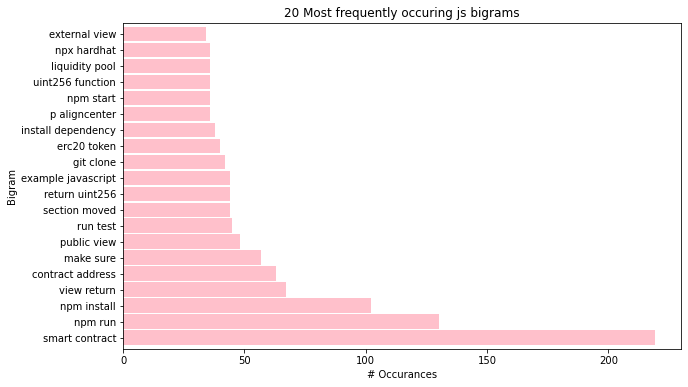

In [211]:
top_20_js_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring js bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

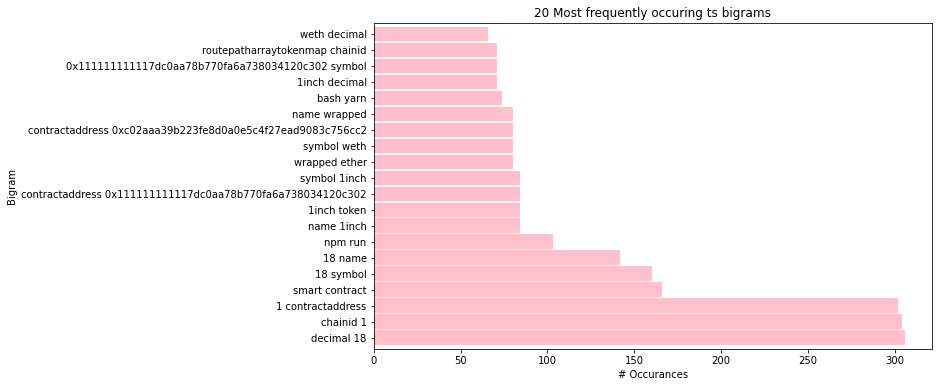

In [212]:
top_20_ts_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ts bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ts_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

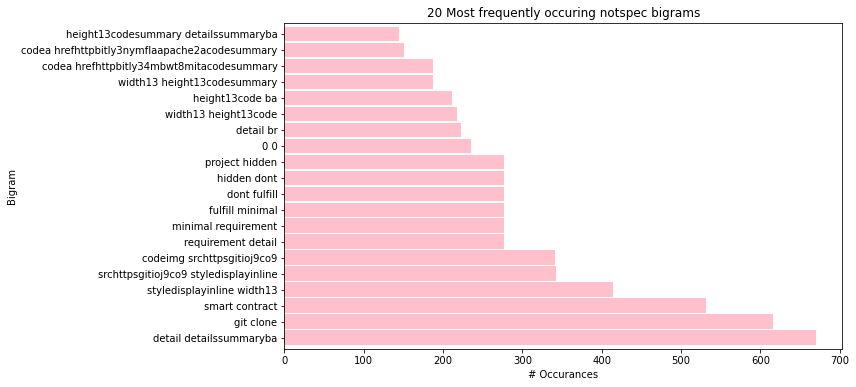

In [213]:
top_20_notspec_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring notspec bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_notspec_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

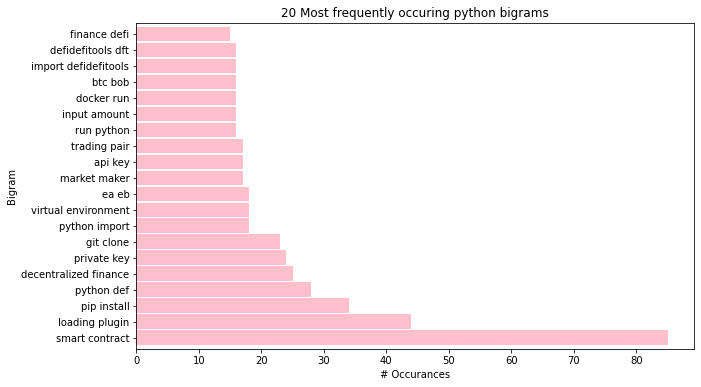

In [214]:
top_20_python_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring python bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

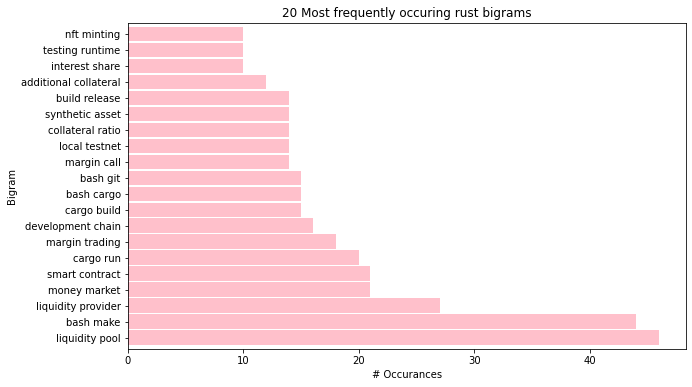

In [215]:
top_20_rust_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring rust bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_rust_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

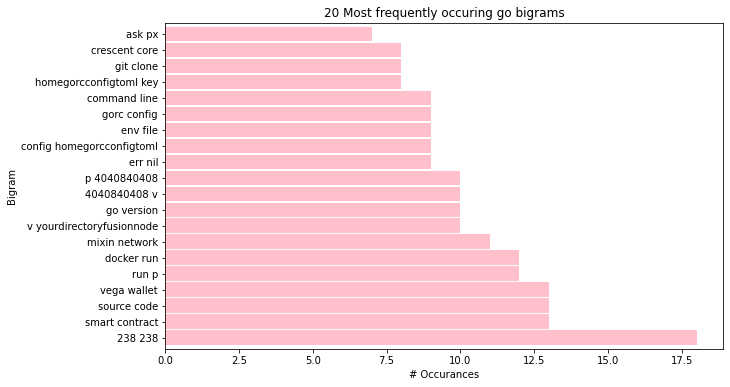

In [216]:
top_20_go_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring go bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_go_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

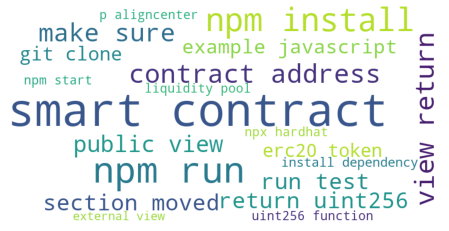

In [217]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_js_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

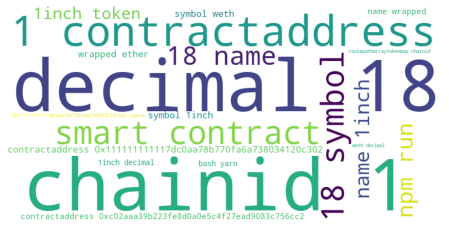

In [218]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ts_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

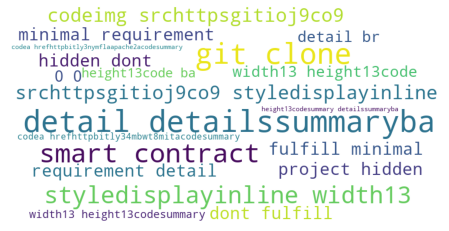

In [219]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_notspec_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

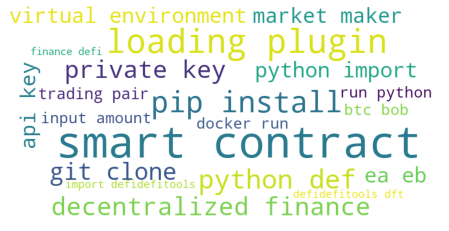

In [220]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

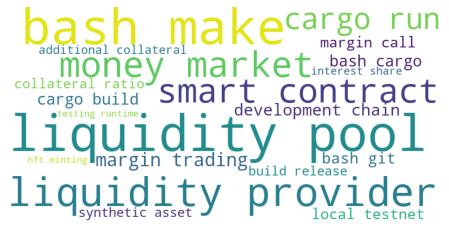

In [221]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_rust_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

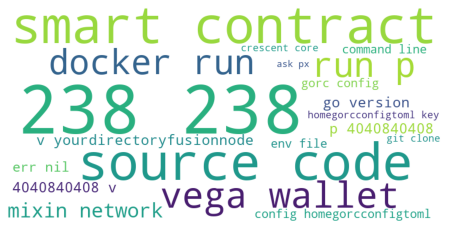

In [222]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_go_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()